# Insurance Forecast by using Linear Regression, Ridge Regression and Lasso Regression.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Medical Cost Personal Datasets
data = pd.read_csv(r'https://github.com/Nabbo-datsct/-nabo-s-files/blob/master/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EXPLORATORY DATA ANALYSIS

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Hence we have three non numerical columns namely "sex", "smoker" and "region" which we later convert into ordinal data.

In [7]:
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [8]:
data["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [9]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Vizualisation

Use seaborn to create a jointplot to compare the age and bmi columns to vizualise the correlation between them [to vaguely estimate the strength of the correlation or presence of multicollinearity(Multicollinearity generally occurs when there are high correlations between two or more predictor variables.)].

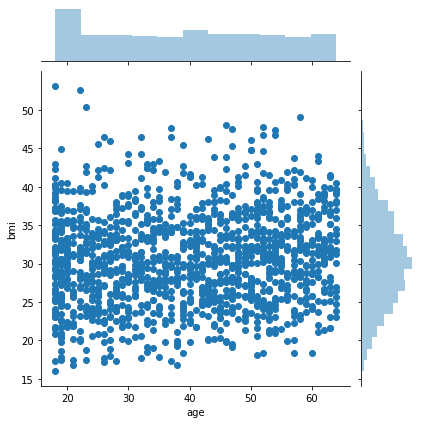

In [10]:
sns.jointplot(x='age', y= 'bmi',data=data)

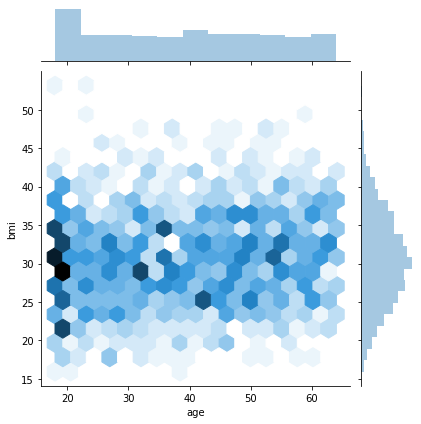

In [11]:
sns.jointplot(x='age', y= 'bmi',data=data, kind= 'hex')

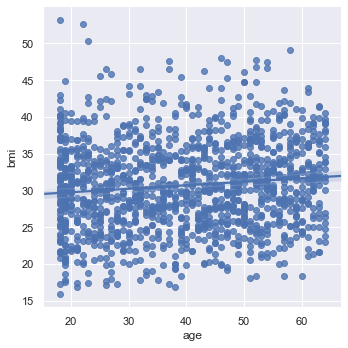

In [13]:
sns.set(color_codes=True)
sns.lmplot(x='age', y='bmi',data = data)


lmplot returns the FacetGrid object with the plot on it for further tweaking.FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of the dataset using multiple panels.

A FacetGrid can be drawn with up to three dimensions − row, col, and hue. The first two have obvious correspondence with the resulting array of axes; thinking of the hue variable as a third dimension along a depth axis, where different levels are plotted with different colors.

FacetGrid object takes a dataframe as input and the names of the variables that will form the row, column, or hue dimensions of the grid.

We now use pairplot to detect any multicollinearity between the predictors. While the column of charges in the plot will give us the dependence of the response variable on the predictor variable.

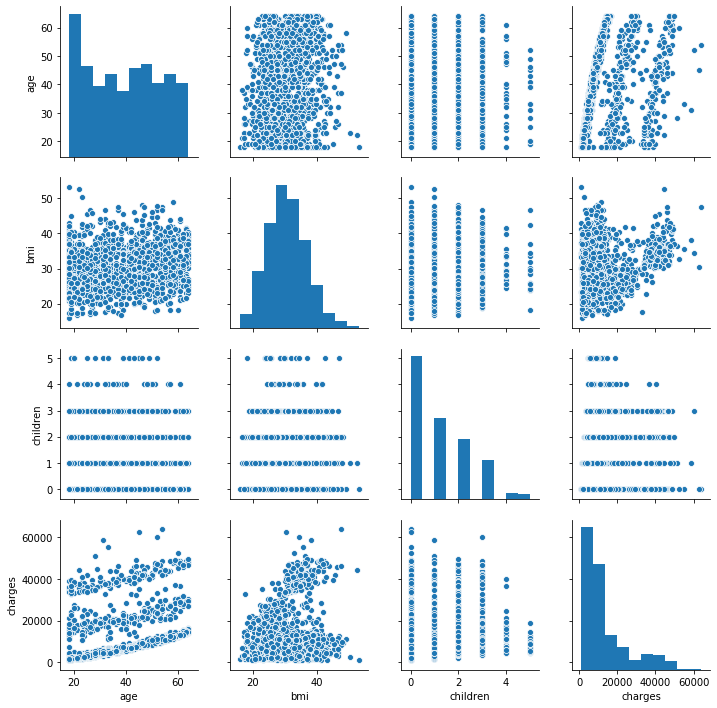

In [12]:
sns.pairplot(data)  

# Preprocessing

Since all the columns in the data are not numerical, we need to follow some data extraction methods before we start building our regression model.

In [14]:
df=data.copy(deep = True)
df #making a copy df of the original dataset "data" that will store only numerical values after preprocessing is executed.
#We use "copy" so that any change in "df" is not reflected back to "data". 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

enc.fit(df["sex"])
df["sex"] = enc.transform(df["sex"])

enc.fit(df["smoker"])
df["smoker"] = enc.transform(df["smoker"])

enc.fit(df["region"])
df["region"] = enc.transform(df["region"])

In [16]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


We save dictionaries for referrence to convert new entry's categorical values to numerical values.
This will come to use only when we work on real time data and are given new entries to predict "charges".

In [18]:
list1 = data["sex"].unique().tolist()
list2 = df["sex"].unique().tolist()
sex_cat_to_num = {list1[i]:list2[i] for i in range(len(list1))}

list1 = data["smoker"].unique().tolist()
list2 = df["smoker"].unique().tolist()
smoker_cat_to_num =  {list1[i]:list2[i] for i in range(len(list1))}

list1 = data["region"].unique().tolist()
list2 = df["region"].unique().tolist()
region_cat_to_num =  {list1[i]:list2[i] for i in range(len(list1))}


print(sex_cat_to_num)
print(smoker_cat_to_num)
print(region_cat_to_num)



{'female': 0, 'male': 1}
{'yes': 1, 'no': 0}
{'southwest': 3, 'southeast': 2, 'northwest': 1, 'northeast': 0}


# Training and Testing Data.
After we are done with a bit of data exploration and conversion of categorical data to numerical, we now go ahead and split the data into training and testing sets. We define a variable X that will contain all the columns except the target column and store the target column, i.e, "charges" in another variable, say y.
 

In [19]:
#Separating target column from the rest of the data.
column_list = df.columns.tolist()
print(column_list)

X = df[column_list[:-1]]
y=df[column_list[-1]]

print(X,y)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns] 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [20]:
#Train-test split of the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)


In [21]:
print(X_train,"\n\n\n\n",X_test,"\n\n\n\n",y_train,"\n\n\n\n",y_test)

      age  sex     bmi  children  smoker  region
1046   43    0  25.080         0       0       0
682    39    1  35.300         2       1       3
1037   45    0  30.495         1       1       1
490    19    0  32.900         0       0       3
39     60    1  39.900         0       1       3
...   ...  ...     ...       ...     ...     ...
1095   18    0  31.350         4       0       0
1130   39    0  23.870         5       0       2
1294   58    1  25.175         0       0       0
860    37    0  47.600         2       1       3
1126   55    1  29.900         0       0       3

[896 rows x 6 columns] 



       age  sex     bmi  children  smoker  region
764    45    0  25.175         2       0       0
887    36    0  30.020         0       0       1
890    64    0  26.885         0       1       1
1293   46    1  25.745         3       0       1
259    19    1  31.920         0       1       1
...   ...  ...     ...       ...     ...     ...
644    43    1  35.310         2       0

# Training the regression models.


In [22]:
#Importing libraries
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [36]:
#linear regression
model=linear_model.LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Coefficients: \n', model.coef_)

Coefficients: 
 [  262.00518915   129.10270377   342.2658478    373.20803797
 23693.32775546  -294.4964067 ]


In [37]:
ridgeregr = linear_model.Ridge(alpha=50, normalize =True)

# Train the model using the training sets
ridgeregr.fit(X_train, y_train)

# Make predictions using the testing set
ridge_y_pred = ridgeregr.predict(X_test)
print('Coefficients: \n', ridgeregr.coef_)

Coefficients: 
 [  4.81463884  16.41963904   7.37597251  16.51207566 455.174007
   0.64767084]


In [38]:
lasso =linear_model.Lasso(alpha=25 , normalize = True) 
lasso.fit(X_train,y_train)

# Make predictions using the testing set
lasso_y_pred = lasso.predict(X_test)
print('Coefficients: \n', lasso.coef_)

Coefficients: 
 [  214.30082379     0.           217.14159442     0.
 21790.43187941    -0.        ]


# Performance Evaluation. 

Create a scatterplot of the real test values versus the predicted values.

Mean squared error: 35132017.8695


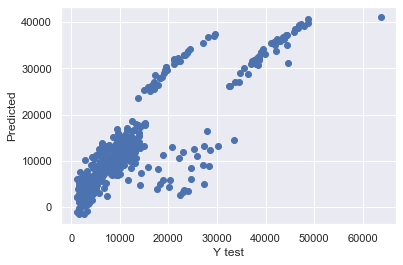

In [39]:
plt.pyplot.scatter(y_test, y_pred)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Y test')
print('Mean squared error: %.4f' % mean_squared_error(y_test, y_pred))

Mean squared error: 142394516.7325


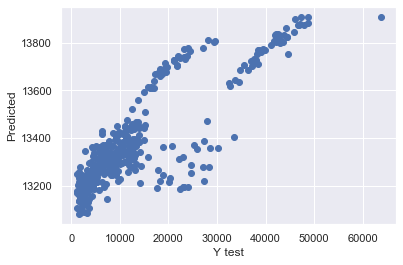

In [40]:
plt.pyplot.scatter(y_test, ridge_y_pred)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Y test')
print('Mean squared error: %.4f' % mean_squared_error(y_test, ridge_y_pred))

Mean squared error: 37186963.0668


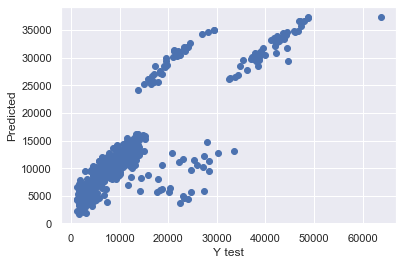

In [41]:
plt.pyplot.scatter(y_test, lasso_y_pred)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Y test')
print('Mean squared error: %.4f' % mean_squared_error(y_test, lasso_y_pred))

"""Comment:"""
Lasso tends to do well if there are a small number of significant parameters and the others are close to zero (ergo: when only a few predictors actually influence the response). Ridge works well if there are many large parameters of about the same value (ergo: when most predictors impact the response).